In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("datos.csv",  sep = ',',index_col=100)

data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z,labels
frame,,,,,,,,,,,,,,,,,,,,,
0,0.498161,0.467475,-0.100165,0.498641,0.446532,-0.116984,0.499733,0.445547,-0.117086,0.500771,...,0.569297,1.177867,0.168567,0.560957,1.088517,0.177005,0.549090,1.162710,0.140601,['walking_to_camera']
1,0.496476,0.462873,-0.190226,0.499399,0.434700,-0.198159,0.503504,0.432089,-0.198323,0.507651,...,0.563690,1.083660,0.341468,0.568623,1.110878,0.288057,0.547120,1.126504,0.307786,['walking_to_camera']
2,0.477304,0.485553,-0.191109,0.481763,0.450345,-0.211882,0.486303,0.448190,-0.212083,0.490944,...,0.562812,1.183079,0.396163,0.551265,1.178909,0.360687,0.528673,1.199254,0.401291,['walking_to_camera']
3,0.475857,0.455566,-0.222601,0.479309,0.426468,-0.249687,0.480578,0.426507,-0.250012,0.487118,...,0.629331,1.441804,0.507042,0.615879,1.420123,0.395186,0.587990,1.440994,0.488921,['walking_to_camera']
4,0.491407,0.427381,-0.300644,0.495430,0.395069,-0.316336,0.499113,0.394277,-0.316601,0.502837,...,0.630890,1.398067,0.400249,0.624117,1.398365,0.257115,0.596413,1.397472,0.356281,['walking_to_camera']


In [3]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
count,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,...,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000
mean,0.476125,0.298873,-0.164736,0.477979,0.286704,-0.166082,0.479342,0.286563,-0.166152,0.480624,...,0.169224,0.479633,0.788168,0.189232,0.489848,0.818673,0.119819,0.472946,0.811016,0.143704
std,0.106588,0.125701,0.167858,0.106461,0.129765,0.161527,0.106404,0.129665,0.161544,0.106506,...,0.123738,0.100687,0.166692,0.130320,0.102484,0.167277,0.120680,0.101670,0.174381,0.130346
min,0.034397,0.073028,-1.006020,0.042008,0.056358,-1.007007,0.043542,0.055508,-1.007027,0.045133,...,-0.564903,0.064213,0.330074,-0.673457,0.044550,0.309023,-0.641412,0.036766,0.296953,-0.784003
25%,0.449964,0.187029,-0.231762,0.451729,0.171360,-0.229668,0.452309,0.170463,-0.229722,0.453574,...,0.086873,0.463456,0.638382,0.115165,0.463438,0.676498,0.041811,0.456488,0.659662,0.071131
50%,0.486787,0.315232,-0.163647,0.487124,0.303163,-0.163160,0.488010,0.302922,-0.163278,0.489125,...,0.164748,0.485809,0.800525,0.204105,0.498988,0.832660,0.119206,0.482221,0.824717,0.152178
75%,0.508662,0.344510,-0.081953,0.510748,0.331316,-0.083060,0.512537,0.330762,-0.083063,0.514349,...,0.250717,0.503105,0.919728,0.271973,0.524676,0.953806,0.198376,0.497392,0.956850,0.224078
max,0.895823,0.615452,0.576961,0.900388,0.622558,0.555654,0.904492,0.622194,0.555675,0.908604,...,0.802933,0.902404,1.807593,0.910703,0.886510,1.871233,0.833181,0.858504,1.846127,0.943463


In [4]:
#Theonly None valus ar the labels
data.dropna(inplace=True)


In [5]:
normalized = data.copy()

In [6]:
for n in normalized:
    try:
        norm = normalized[n]/normalized[n].max()
        normalized[n] = norm
    except:
        0

normalized.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z,labels
frame,,,,,,,,,,,,,,,,,,,,,
0,0.577221,0.765595,-0.297428,0.573092,0.731199,-0.351688,0.572610,0.729162,-0.352021,0.571083,...,0.633676,0.651622,0.282365,0.632770,0.581711,0.271947,0.645252,0.629811,0.224101,['walking_to_camera']
1,0.575267,0.758059,-0.564853,0.573963,0.711823,-0.595725,0.576932,0.707138,-0.596263,0.578929,...,0.627436,0.599504,0.571987,0.641417,0.593661,0.442567,0.642937,0.610199,0.490576,['walking_to_camera']
2,0.553053,0.795201,-0.567475,0.553694,0.737443,-0.636981,0.557221,0.733488,-0.637635,0.559877,...,0.626457,0.654505,0.663606,0.621837,0.630017,0.554154,0.621258,0.649605,0.639612,['walking_to_camera']
3,0.551376,0.746091,-0.660988,0.550874,0.698344,-0.750633,0.550662,0.698002,-0.751668,0.555513,...,0.700499,0.797637,0.849339,0.694722,0.758924,0.607157,0.690964,0.780550,0.779284,['walking_to_camera']
4,0.569394,0.699931,-0.892727,0.569401,0.646928,-0.950999,0.571899,0.645256,-0.951871,0.573439,...,0.702235,0.773441,0.670451,0.704015,0.747296,0.395027,0.700862,0.756975,0.567871,['walking_to_camera']


Varianza explicada por cada componente principal:
Componente 1: 0.3491
Componente 2: 0.2321
Componente 3: 0.1348
Componente 4: 0.1131
Componente 5: 0.0646
Componente 6: 0.0369
Componente 7: 0.0235
Componente 8: 0.0116
Componente 9: 0.0066
Componente 10: 0.0055
Componente 11: 0.0046
Componente 12: 0.0041
Componente 13: 0.0028
Componente 14: 0.0020
Componente 15: 0.0018
Componente 16: 0.0014
Componente 17: 0.0012


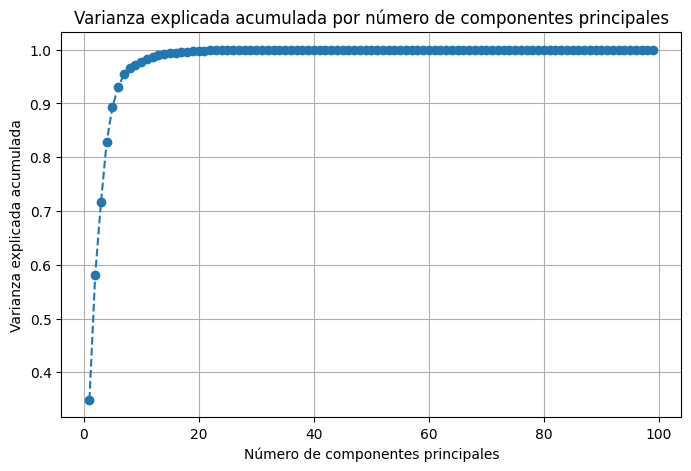

In [7]:
#Calcular la varianza explicada acumulada

data_2=normalized.drop('labels', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_14608\3486015392.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


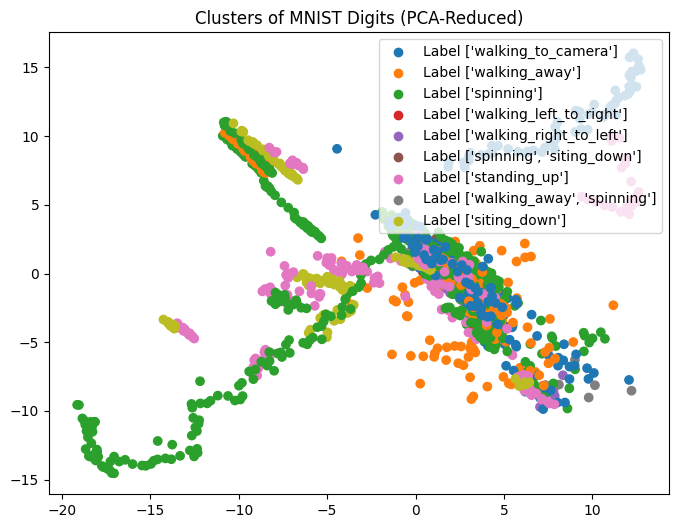

In [26]:
labels = data['labels']

data_2=normalized.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=17)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


C:\Users\camic\AppData\Local\Temp\ipykernel_14608\3204476510.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}
C:\Users\camic\AppData\Local\Temp\ipykernel_14608\3204476510.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors, cmap='viridis')


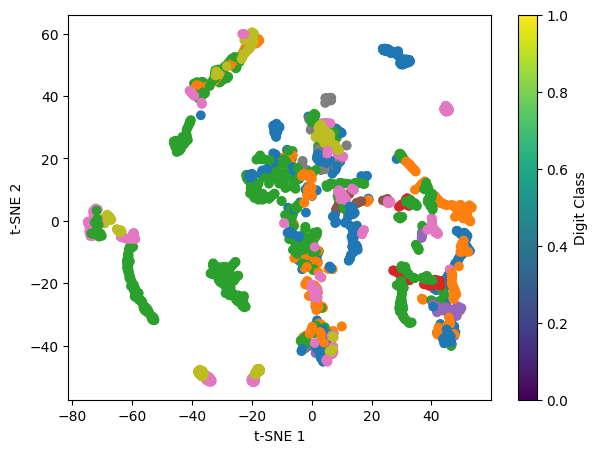

In [27]:
labels = data['labels']

data_2=normalized.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X)
colors = [label_colors[label] for label in labels]

plt.figure(figsize=(15, 5))
plt.subplot(121)
# Plot the TSNE results with label
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Digit Class')


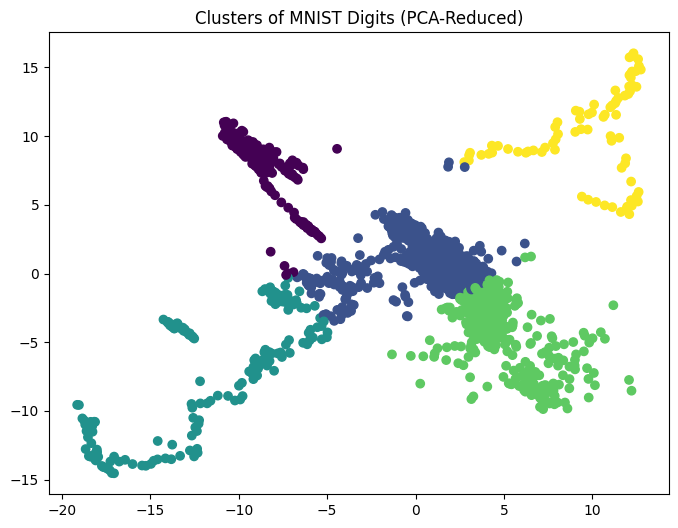

In [28]:
labels = data['labels']

data_2=normalized.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

In [8]:
result_data = []

df = normalized.copy()

grouped = df.groupby('labels')

for label, group in grouped:

    for i in range(0, len(group)-5):
        frame_group = group.iloc[i:i + 5]


        if len(frame_group) >= 5:

            group_data = {'label': label}
            for j in range(33):  
                for k in range(5): 
                    group_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                    group_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                    group_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']

            result_data.append(group_data)


result_df = pd.DataFrame(result_data)

result_df

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_x_frame_3,landmark_0_y_frame_3,landmark_0_z_frame_3,...,landmark_32_z_frame_2,landmark_32_x_frame_3,landmark_32_y_frame_3,landmark_32_z_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5
0,['siting_down'],0.557848,0.488333,-0.610927,0.555823,0.495988,-0.613833,0.558536,0.491173,-0.607711,...,0.143606,0.572601,0.386006,0.026008,0.575249,0.387101,0.080983,0.574168,0.385278,0.099033
1,['siting_down'],0.555823,0.495988,-0.613833,0.558536,0.491173,-0.607711,0.556962,0.491302,-0.585265,...,0.026008,0.575249,0.387101,0.080983,0.574168,0.385278,0.099033,0.568336,0.383921,0.127905
2,['siting_down'],0.558536,0.491173,-0.607711,0.556962,0.491302,-0.585265,0.557036,0.491204,-0.613842,...,0.080983,0.574168,0.385278,0.099033,0.568336,0.383921,0.127905,0.565535,0.386024,0.060829
3,['siting_down'],0.556962,0.491302,-0.585265,0.557036,0.491204,-0.613842,0.556722,0.491888,-0.549101,...,0.099033,0.568336,0.383921,0.127905,0.565535,0.386024,0.060829,0.562426,0.386550,0.109353
4,['siting_down'],0.557036,0.491204,-0.613842,0.556722,0.491888,-0.549101,0.557934,0.491522,-0.545425,...,0.127905,0.565535,0.386024,0.060829,0.562426,0.386550,0.109353,0.557160,0.386650,0.115918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,['walking_to_camera'],0.768704,0.275928,-0.775667,0.764582,0.275604,-0.800771,0.757331,0.281158,-0.782075,...,0.391744,0.771953,0.564158,0.452817,0.768009,0.563881,0.515141,0.767973,0.560844,0.491413
2095,['walking_to_camera'],0.764582,0.275604,-0.800771,0.757331,0.281158,-0.782075,0.754016,0.278404,-0.892670,...,0.452817,0.768009,0.563881,0.515141,0.767973,0.560844,0.491413,0.774234,0.548245,0.501559
2096,['walking_to_camera'],0.757331,0.281158,-0.782075,0.754016,0.278404,-0.892670,0.747354,0.282905,-0.879669,...,0.515141,0.767973,0.560844,0.491413,0.774234,0.548245,0.501559,0.746127,0.559424,0.451698
2097,['walking_to_camera'],0.754016,0.278404,-0.892670,0.747354,0.282905,-0.879669,0.742964,0.290924,-0.914989,...,0.491413,0.774234,0.548245,0.501559,0.746127,0.559424,0.451698,0.762188,0.548030,0.470992


Varianza explicada por cada componente principal:
Componente 1: 0.3356
Componente 2: 0.2171
Componente 3: 0.1263
Componente 4: 0.1023
Componente 5: 0.0583
Componente 6: 0.0306
Componente 7: 0.0170
Componente 8: 0.0133
Componente 9: 0.0092
Componente 10: 0.0063
Componente 11: 0.0061
Componente 12: 0.0055
Componente 13: 0.0050
Componente 14: 0.0044
Componente 15: 0.0041
Componente 16: 0.0039
Componente 17: 0.0038


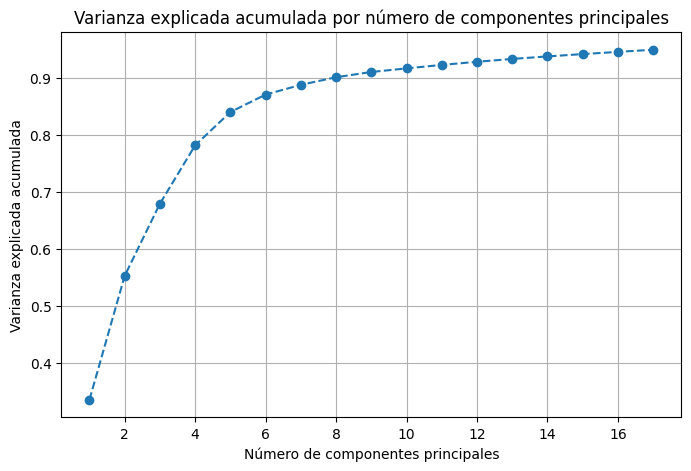

In [10]:
#Calcular la varianza explicada acumulada

data_group=result_df.drop('label', axis=1)
X = StandardScaler().fit_transform(data_group)
pca = PCA(n_components=17) # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_28056\1820502827.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


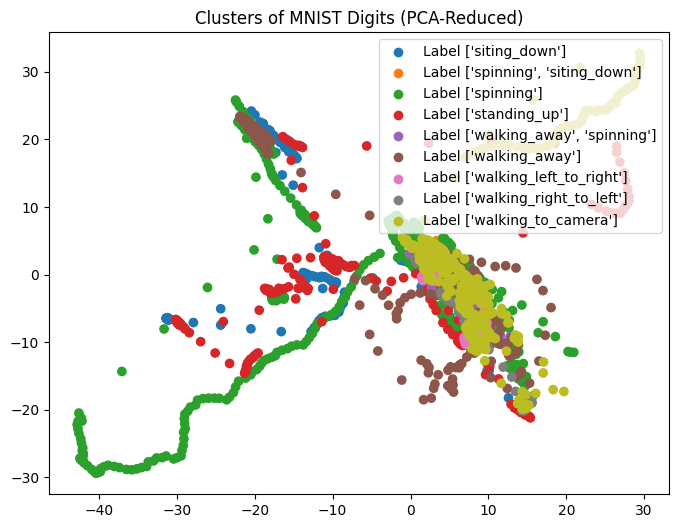

In [11]:
labels = result_df['label']

data_group=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_group)

pca = PCA(n_components=17)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_28056\1535030347.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}
c:\Users\camic\OneDrive\Documentos\Inteligencia artificial\ProjectIA\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\camic\OneDrive\Documentos\Inteligencia artificial\ProjectIA\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"foun

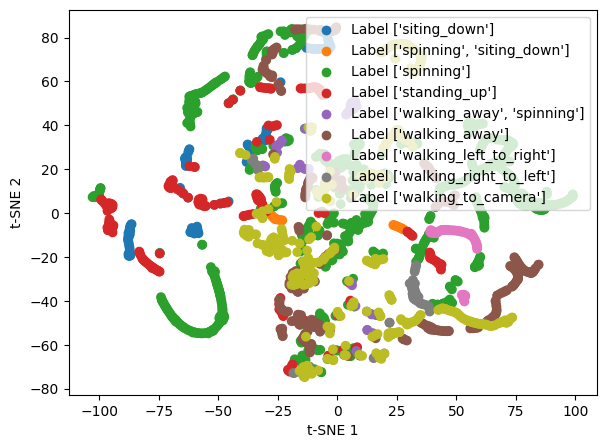

In [12]:
labels = result_df['label']

data_group=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_group)

unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X)

plt.figure(figsize=(15, 5))
plt.subplot(121)
# Plot the TSNE results with label
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')


plt.legend()
plt.show()